In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
csv_path = '../data/history/flightsHistory.csv.gz'

data = pd.read_csv(csv_path)

cols_remove = ['arr_actual_utc']
for col in cols_remove:
    data.drop(col, axis=1, inplace=True) # remove the column with no header

/var/folders/fy/f4c573kn4x3462qpp_j4d_h80000gn/T/ipykernel_33577/2567980579.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


In [11]:
data.head()

,Row,flight_iata,airline_iata,dep_time_utc,dep_actual_utc,arr_time_utc,dep_iata,arr_iata,dep_country_code,arr_country_code,...,dep_rain,dep_snowfall,dep_weather_code,dep_cloud_cover,dep_cloud_cover_low,dep_cloud_cover_mid,dep_cloud_cover_high,dep_wind_speed_10m,dep_wind_speed_100m,dep_wind_gusts_10m
0,0,vn30,vn,2022-10-17 14:35:00,2022-10-17 14:54:00,2022-10-18 07:55:00,FRA,SGN,DE,VN,...,0.0,0.0,3.0,82.199997,53.0,9.0,97.0,6.297428,13.708390,18.000000
1,1,qh74,qh,2022-10-17 20:10:00,2022-10-17 20:31:00,2022-10-18 12:50:00,FRA,HAN,DE,VN,...,0.0,0.0,2.0,78.000000,0.0,93.0,74.0,6.638072,13.551500,11.520000
2,2,vj910,vj,2022-10-18 01:25:00,2022-10-18 02:45:00,2022-10-18 07:45:00,BOM,HAN,IN,VN,...,0.2,0.0,51.0,76.200005,22.0,44.0,100.0,3.219938,5.116561,9.000000
3,3,qr970,qr,2022-10-18 02:35:00,2022-10-18 03:03:00,2022-10-18 14:25:00,DOH,SGN,QA,VN,...,0.0,0.0,0.0,9.900001,0.0,0.0,33.0,11.966953,20.523155,17.280001
4,4,tk162,tk,2022-10-18 02:45:00,2022-10-18 02:40:00,2022-10-18 17:05:00,IST,SGN,TR,VN,...,0.0,0.0,2.0,61.199997,68.0,0.0,0.0,26.987997,39.463947,46.439999


# Data Exploration

Let's go through each attribute (feature) of the data to see if there's any interesting observation 😄

In [12]:
data.flight_iata.value_counts()

flight_iata
vn920     662
ak642     598
vj970     535
vj963     507
vj975     501
         ... 
ak647       1
vn7954      1
bl6079      1
5y9724      1
vj1423      1
Name: count, Length: 3413, dtype: int64

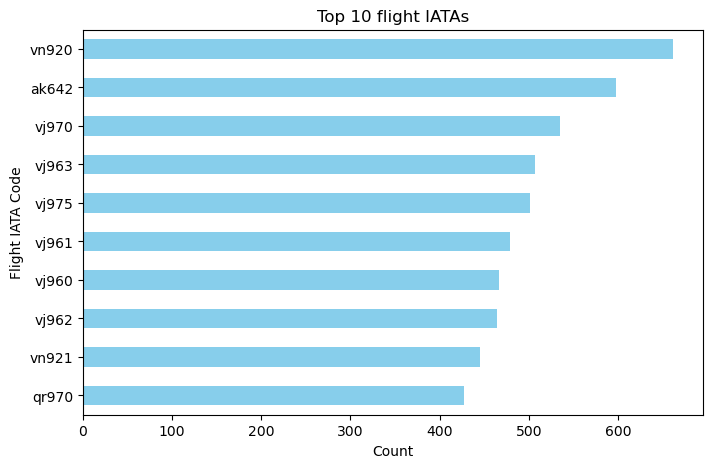

In [13]:
flight_iatas = data.flight_iata.value_counts().head(10)[::-1]

# Plotting the bar plot
plt.figure(figsize=(8, 5))
flight_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 flight IATAs')
plt.xlabel('Count')
plt.ylabel('Flight IATA Code')
plt.show()

In [14]:
data.airline_iata.value_counts()

airline_iata
vj     114371
vn     108957
qh      48313
bl      18611
ak       9528
        ...  
gj          2
te          1
b3          1
qe          1
ejm         1
Name: count, Length: 93, dtype: int64

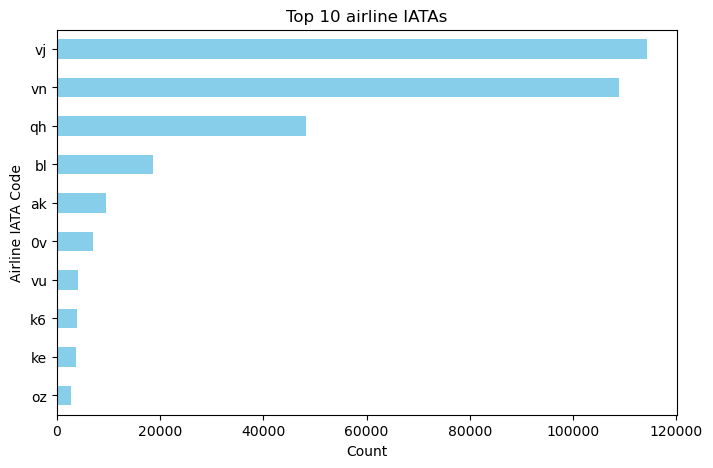

In [15]:
airline_iatas = data.airline_iata.value_counts().head(10)[::-1]

plt.figure(figsize=(8, 5))
airline_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 airline IATAs')
plt.xlabel('Count')
plt.ylabel('Airline IATA Code')
plt.show()

In [16]:
unique_dates = data.dep_time_utc.apply(lambda x: x.split(' ')[0]).value_counts()
unique_dates.index = pd.to_datetime(unique_dates.index)
num_flights_daily = unique_dates.sort_index()
num_flights_daily

dep_time_utc
2022-10-17      2
2022-10-18    761
2022-10-19    780
2022-10-20    767
2022-10-21    813
             ... 
2023-11-27    767
2023-11-28    753
2023-11-29    786
2023-11-30    755
2023-12-01     14
Name: count, Length: 411, dtype: int64

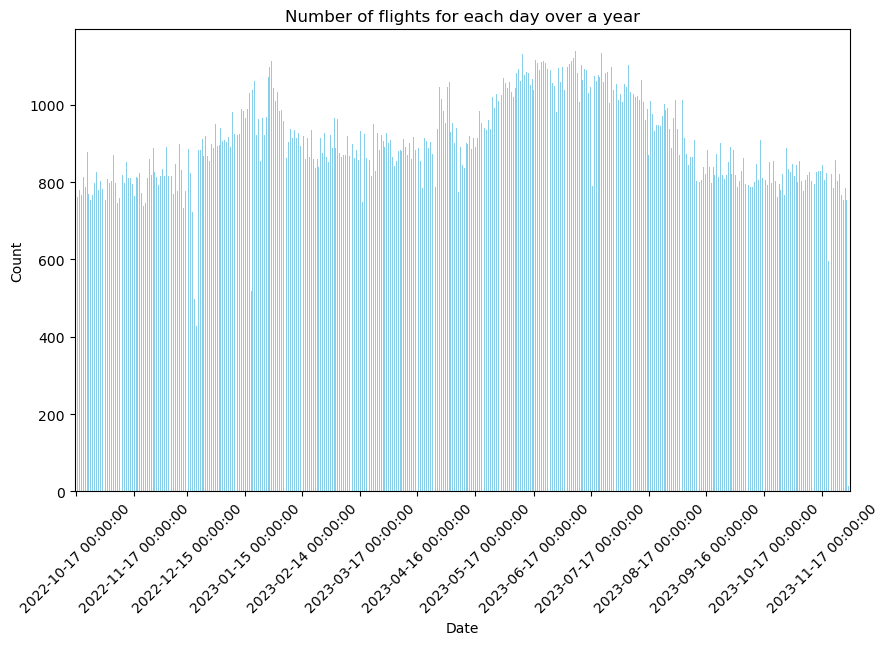

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
num_flights_daily.plot(kind='bar', color='skyblue', ax=ax)

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator())

# Add labels and title
plt.title('Number of flights for each day over a year')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

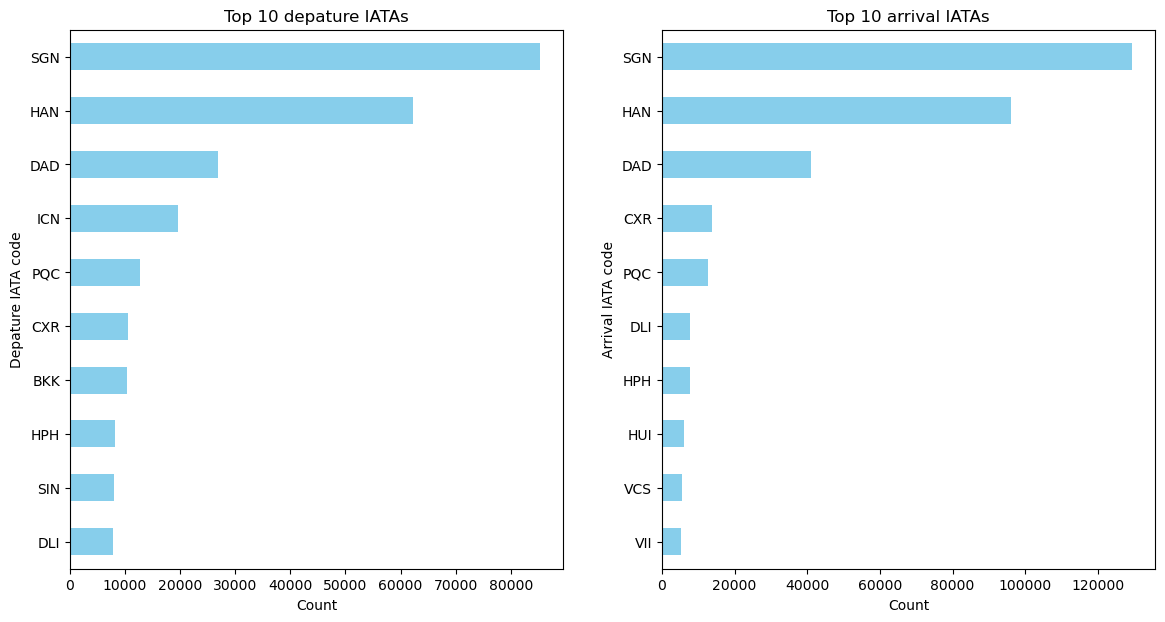

In [19]:
dep_iatas = data.dep_iata.value_counts().head(10)[::-1]
arr_iatas = data.arr_iata.value_counts().head(10)[::-1]

plt.figure(figsize=(14, 7))
plt.subplot(121)
dep_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 depature IATAs')
plt.xlabel('Count')
plt.ylabel('Depature IATA code')

plt.subplot(122)
arr_iatas.plot(kind='barh', color='skyblue')
plt.title('Top 10 arrival IATAs')
plt.xlabel('Count')
plt.ylabel('Arrival IATA code')

plt.show()

Looks like Saigon and Hanoi have the most number of flight coming in an out

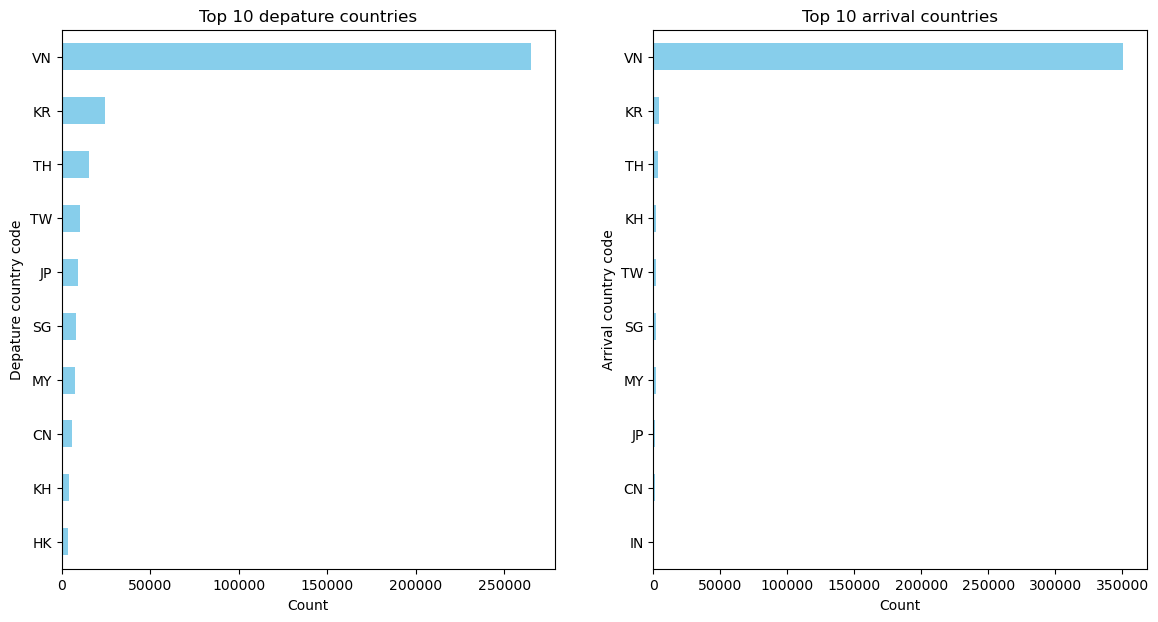

In [20]:
dep_countries = data.dep_country_code.value_counts().head(10)[::-1]
arr_countries = data.arr_country_code.value_counts().head(10)[::-1]

plt.figure(figsize=(14, 7))
plt.subplot(121)
dep_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 depature countries')
plt.xlabel('Count')
plt.ylabel('Depature country code')

plt.subplot(122)
arr_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 arrival countries')
plt.xlabel('Count')
plt.ylabel('Arrival country code')

plt.show()

In this dataset, there is a large number of flights coming out of Vietnam and Vietnam is also the main destination as shown in the plot and below

In [21]:
data.arr_country_code.value_counts()['VN']

350669

Now, let's plot the average delay for each day over the course of the year

In [22]:
date_and_delay_cols = ['dep_time_utc', 'delayed']
date_n_delay = data[date_and_delay_cols].copy()
# Select only the date and remove the time
date_n_delay.dep_time_utc = date_n_delay.dep_time_utc.apply(lambda x: x.split(' ')[0])
# Turn strings of date into date time format
date_n_delay.dep_time_utc = pd.to_datetime(date_n_delay.dep_time_utc)
date_n_delay.head()

,dep_time_utc,delayed
0,2022-10-17,-56.0
1,2022-10-17,-48.0
2,2022-10-18,53.0
3,2022-10-18,-18.0
4,2022-10-18,-59.0


In [23]:
avg_delay_per_date = date_n_delay.groupby('dep_time_utc')['delayed'].mean()
avg_delay_per_date

dep_time_utc
2022-10-17   -52.000000
2022-10-18    -2.957950
2022-10-19     2.374359
2022-10-20    -1.907432
2022-10-21    -0.067651
                ...    
2023-11-27    -2.941330
2023-11-28    -3.981408
2023-11-29    -6.583969
2023-11-30     1.034437
2023-12-01    -0.857143
Name: delayed, Length: 411, dtype: float64

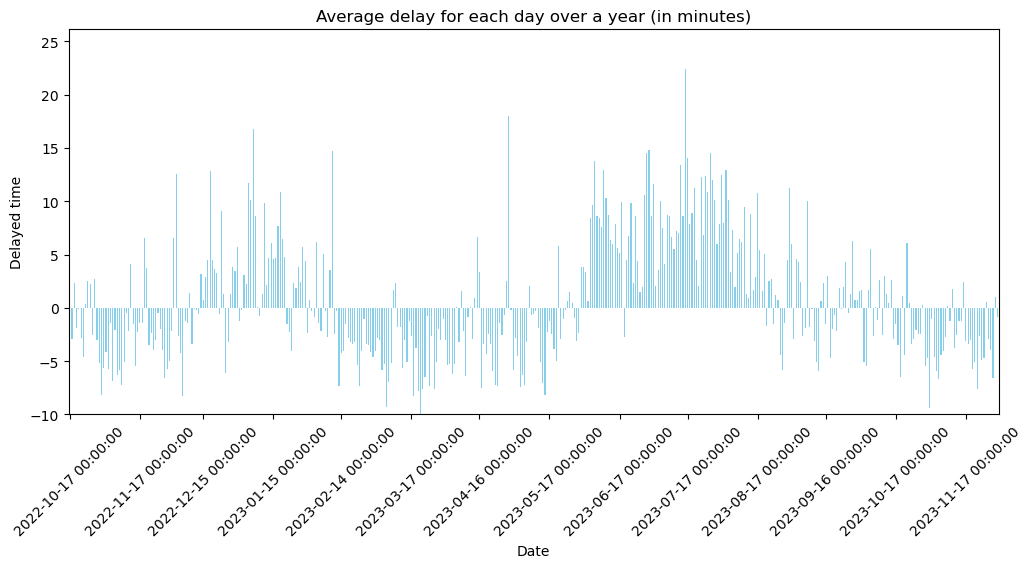

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
avg_delay_per_date.plot(kind='bar', color='skyblue', ax=ax)

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))

# Set the lower bound of the y-axis to -20
ax.set_ylim(bottom=-10)

# Add labels and title
plt.title('Average delay for each day over a year (in minutes)')
plt.xlabel('Date')
plt.ylabel('Delayed time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We found something cool here. It looks like during new year holidays (around 15 minutes) and summer vacations (around 20 minutes), the average delayed time is much greater compared to normal time during the year. And maybe it's best to take a flight on Feb, March, or April ✌️

In [25]:
date_n_delay['delay_bool'] = date_n_delay.delayed.apply(lambda x: 1 if x > 0 else 0)

In [26]:
num_delay_daily = date_n_delay.groupby('dep_time_utc')['delay_bool'].sum()
num_delay_daily

dep_time_utc
2022-10-17      0
2022-10-18    242
2022-10-19    313
2022-10-20    250
2022-10-21    318
             ... 
2023-11-27    270
2023-11-28    257
2023-11-29    223
2023-11-30    313
2023-12-01      6
Name: delay_bool, Length: 411, dtype: int64

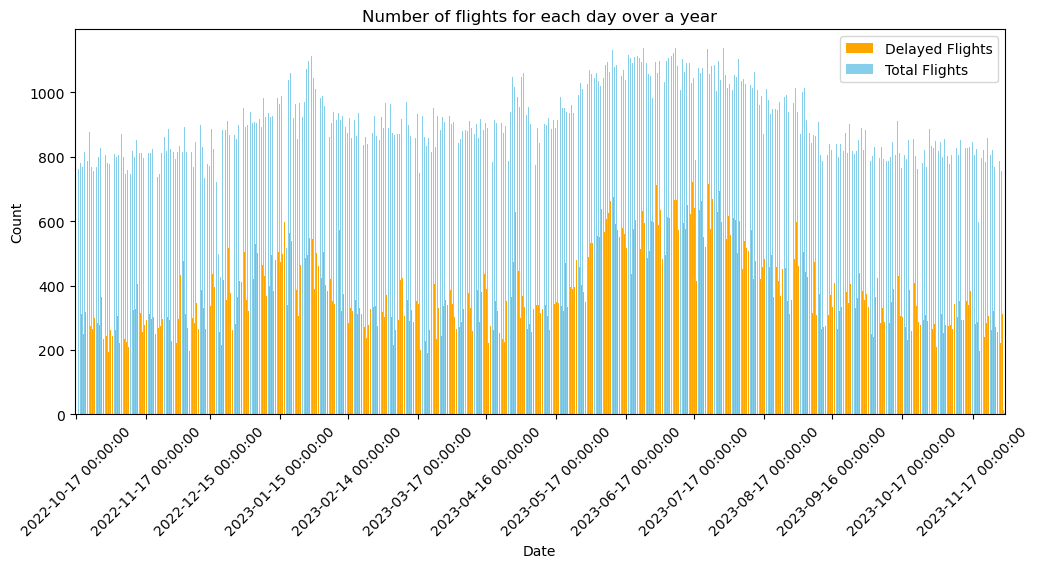

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))

num_delay_daily.plot(kind='bar', color='orange', ax=ax, position=0, width=0.4, label='Delayed Flights')
num_flights_daily.plot(kind='bar', color='skyblue', ax=ax, position=1, width=0.4, label='Total Flights')

# Set the locator for the x-axis to show only the first day of each month
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))

# Add labels and title
plt.title('Number of flights for each day over a year')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

`Question:` How does the number of flights each day correlated with the number of delayed flights? Or does more number of flights mean 

If in any case the two are related, the relationship is **non-linear**. The number of delayed flights increases much slower than the increase in the total number of flights

## Delay difference on weekdays and weekends

In [28]:
def is_weekend(date_str):
    # Convert the input string to a datetime object
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")

    # Check if the day of the week is either Saturday (5) or Sunday (6)
    return date_obj.weekday() in [5, 6]

# Example usage
date_to_check = "2023-09-24"
if is_weekend(date_to_check):
    print(f"{date_to_check} is a weekend.")
else:
    print(f"{date_to_check} is not a weekend.")

2023-09-24 is a weekend.


In [29]:
date_and_delay_cols = ['dep_time_utc', 'delayed']
date_n_delay2 = data[date_and_delay_cols].copy()
# Select only the date and remove the time
date_n_delay2.dep_time_utc = date_n_delay2.dep_time_utc.apply(lambda x: x.split(' ')[0])
date_n_delay2.head()

,dep_time_utc,delayed
0,2022-10-17,-56.0
1,2022-10-17,-48.0
2,2022-10-18,53.0
3,2022-10-18,-18.0
4,2022-10-18,-59.0


In [30]:
date_n_delay2['weekend'] = date_n_delay2['dep_time_utc'].apply(is_weekend)
date_n_delay2.head()

,dep_time_utc,delayed,weekend
0,2022-10-17,-56.0,False
1,2022-10-17,-48.0,False
2,2022-10-18,53.0,False
3,2022-10-18,-18.0,False
4,2022-10-18,-59.0,False


In [31]:
date_n_delay2.weekend.value_counts()

weekend
False    262940
True     107256
Name: count, dtype: int64

In [32]:
avg_delay = date_n_delay2.groupby('weekend')['delayed'].mean()
avg_delay

weekend
False    0.902727
True     1.260219
Name: delayed, dtype: float64

In [33]:
median_delay = date_n_delay2.groupby('weekend')['delayed'].median()
median_delay
# There is not much to say here

weekend
False   -4.0
True    -4.0
Name: delayed, dtype: float64

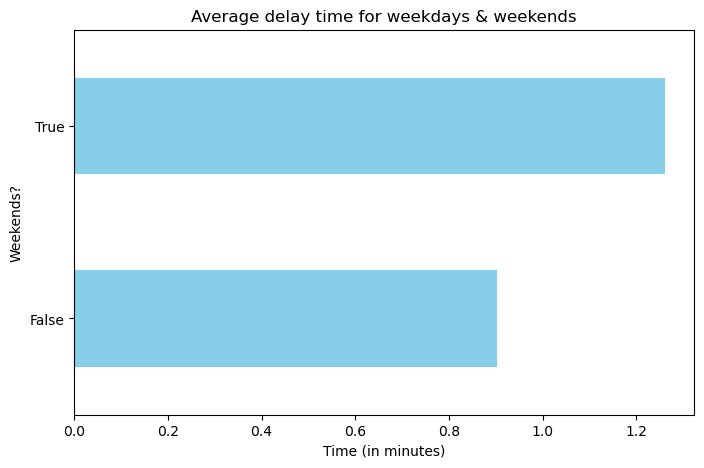

In [34]:
plt.figure(figsize=(8, 5))
avg_delay.plot(kind='barh', color='skyblue')
plt.title('Average delay time for weekdays & weekends')
plt.xlabel('Time (in minutes)')
plt.ylabel('Weekends?')
plt.show()

## Average delay for each airline

We will just pick out airlines with the number of flights are 1000 or more to make sure the statistics is right!

In [35]:
# Filter out samples where it's airline iata appears 1000 times or more
NUM_SAMPLES_THRES = 1000
airline_counts = data.airline_iata.value_counts()
data_iata_fltd =  data[data['airline_iata'].isin(airline_counts[airline_counts >= NUM_SAMPLES_THRES].index)].copy()

In [36]:
airline_iata_n_delay = data_iata_fltd.groupby('airline_iata')['delayed'].mean()
avg_delay = airline_iata_n_delay.sort_values(ascending=False)
num_samples = data_iata_fltd.airline_iata.value_counts()

In [37]:
avg_delay = airline_iata_n_delay.sort_values(ascending=False)
avg_delay

airline_iata
oz    15.320188
tr    11.305211
bl     9.410779
vj     9.388114
lj     9.002880
7c     5.041618
mh     5.007708
ke     3.860671
we     3.099399
br     2.717427
vu     2.459500
jl     2.190155
bx     1.696525
tw     1.026316
sq     1.020054
ak    -1.525294
qr    -1.788433
qh    -1.891354
cx    -2.068139
jx    -2.154920
qv    -2.461815
cz    -4.312428
ci    -5.809668
k6    -6.955516
vn    -7.140734
0v   -12.723912
nh   -19.150030
Name: delayed, dtype: float64

In [38]:
top5_most = avg_delay[:5]
top5_most

airline_iata
oz    15.320188
tr    11.305211
bl     9.410779
vj     9.388114
lj     9.002880
Name: delayed, dtype: float64

In [39]:
num_samples[top5_most.index] # number of samples

airline_iata
oz      2764
tr      2015
bl     18611
vj    114371
lj      1736
Name: count, dtype: int64

In [40]:
top5_least = avg_delay[-5:]
top5_least

airline_iata
ci    -5.809668
k6    -6.955516
vn    -7.140734
0v   -12.723912
nh   -19.150030
Name: delayed, dtype: float64

In [41]:
num_samples[top5_least.index]

airline_iata
ci      2648
k6      3889
vn    108957
0v      7034
nh      1693
Name: count, dtype: int64